Made by: **Abdulsamod Olaoye**

This notebook performs sentiment analysis on the Yoruba health dataset and provides an output of proper sentiment label of each row of data in the dataset.

In [2]:
import pandas as pd

# Load dataset
yoruba_df = pd.read_excel('/content/yoruba_health_cleaned.xlsx')

# Preview
yoruba_df.head(5)


Yoruba Language  \
0  igbes·∫π yii waye lati j·∫π k√≠ ab·∫πr·∫π naa tete de s...   
1  bavarian nordic a/s lo pelo ab·∫πr·∫π naa, ti aj·ªç ...   
2  t·∫πl·∫π, ko si ab·∫πr·∫π aj·∫πsara fun aarun mpox, eyi ...   
3  ·ªçga agba fun who, dokita tedros adhanom ghebre...   
4  dokita yukiko nakatani salaye pe bibuw·ªçlu ab·∫πr...   

                                 English Translation  
0  this step was taken to make the vaccine quickl...  
1  bavarian nordic a/s produced the vaccine, and ...  
2  previously, there was no vaccine for mpox, whi...  
3  who director-general, dr. tedros adhanom ghebr...  
4  dr. yukiko nakatani explained that the approva...

In [8]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\\S+|www\\S+", "", text)  # remove links
    text = re.sub(r"[^a-zA-Z0-9\s√°√†√®√©√≠√¨√≥√≤√∫√π·ªç·π£]", "", text)  # keep Yoruba chars and spaces
    text = re.sub(r"\s+", " ", text).strip() # replace multiple spaces with single and strip
    return text

yoruba_df['clean_text'] = yoruba_df['Yoruba Language'].apply(clean_text)
yoruba_df.head()

Yoruba Language  \
0  igbes·∫π yii waye lati j·∫π k√≠ ab·∫πr·∫π naa tete de s...   
1  bavarian nordic a/s lo pelo ab·∫πr·∫π naa, ti aj·ªç ...   
2  t·∫πl·∫π, ko si ab·∫πr·∫π aj·∫πsara fun aarun mpox, eyi ...   
3  ·ªçga agba fun who, dokita tedros adhanom ghebre...   
4  dokita yukiko nakatani salaye pe bibuw·ªçlu ab·∫πr...   

                                 English Translation  \
0  this step was taken to make the vaccine quickl...   
1  bavarian nordic a/s produced the vaccine, and ...   
2  previously, there was no vaccine for mpox, whi...   
3  who director-general, dr. tedros adhanom ghebr...   
4  dr. yukiko nakatani explained that the approva...   

                                          clean_text sentiment  text_length  
0  igbes yii waye lati j k√≠ abr naa tete de sibi ...  positive            1  
1  bavarian nordic as lo pelo abr naa ti aj·ªç euro...   neutral            1  
2  tl ko si abr ajsara fun aarun mpox eyi to fa t...   neutral            1  
3  ·ªçga agba fun who dokita tedros adhanom ghebrey...  positive            1  
4  dokita yukiko nakatani salaye pe bibuw·ªçlu abr ...   neutral            1

In [5]:
# Adding sentiment labels to the data
# Needed for sentiment visualization

!pip install textblob
from textblob import TextBlob
import pandas as pd

def detect_sentiment(text):
    try:
        blob = TextBlob(str(text))
        polarity = blob.sentiment.polarity
        if polarity > 0.1:
            return 'positive'
        elif polarity < -0.1:
            return 'negative'
        else:
            return 'neutral'
    except:
        return 'neutral'

# Apply to English Translation column
yoruba_df['sentiment'] = yoruba_df['English Translation'].apply(detect_sentiment)

# Check results
yoruba_df[['English Translation', 'sentiment']].head(10)

# Save to Excel
yoruba_df.to_excel('yoruba_health_labeled.xlsx', index=False)


**Exploratory Data Analysis**

This section analyses and visualizes the dataset, exploring things like text length, word frequency, and sentiment distribution.

In [9]:
# Text Length Distribution - visualizing the length of sentences in the dataset and their frequencies

import matplotlib.pyplot as plt

# Create a column for text length
yoruba_df['text_length'] = yoruba_df['clean_text'].apply(lambda x: len(str(x).split()))

# Plot distribution
plt.hist(yoruba_df['text_length'], bins=30)
plt.title('Distribution of Text Lengths in Yoruba Health Dataset')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

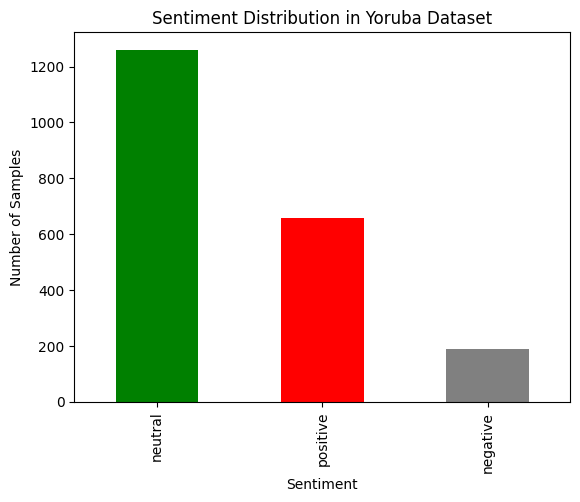

In [11]:
# Sentiment Distribution - visualizing the number of positive, negative or neutral sentences

yoruba_df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution in Yoruba Health Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Number of Samples')
plt.show()

In [12]:
# Word Frequency Analysis - this checks for most frequent words in the dataset

from collections import Counter

# Combine all Yoruba text
all_words = ' '.join(yoruba_df['clean_text']).split()

# Count the most common words
word_freq = Counter(all_words)
most_common = word_freq.most_common(20)

# Visualize
words, counts = zip(*most_common)
plt.barh(words, counts)
plt.title('Top 20 Most Common Yoruba Health Words')
plt.gca().invert_yaxis()
plt.show()

In [13]:
# Common words by sentiment - this identifies the most common positive and negative words

# Separate by sentiment
positive_text = ' '.join(yoruba_df[yoruba_df['sentiment'] == 'positive']['clean_text'])
negative_text = ' '.join(yoruba_df[yoruba_df['sentiment'] == 'negative']['clean_text'])

positive_words = Counter(positive_text.split()).most_common(10)
negative_words = Counter(negative_text.split()).most_common(10)

print("üîπ Top Positive Words:")
for w, c in positive_words:
    print(f"{w}: {c}")

print("\nüî∏ Top Negative Words:")
for w, c in negative_words:
    print(f"{w}: {c}")


üîπ Top Positive Words:
√†w·ªçn: 1000
t√≠: 819
√†ti: 617
n√≠: 551
√≥: 477
w·ªçn: 473
·π£e: 356
ti: 344
f√∫n: 329
l√°ti: 314

üî∏ Top Negative Words:
√†w·ªçn: 300
t√≠: 212
w·ªçn: 159
√†ti: 148
n√≠: 139
√≥: 111
ti: 96
ni: 96
·π£e: 82
l√°ti: 74
